# Ch.3 Processing Raw Text

## 3-1 Accessing Text from the Web and from Disk
you may be interested in analyzing other texts from Project Gutenberg. You can browse the catalog of 25,000 free online books at http://www.gutenberg.org/catalog/, and obtain a URL to an ASCII text file  

Text number 2554 is an English translation of Crime and Punishment, and we can access it as follows.

In [1]:
from urllib import request

In [2]:
url = "http://www.gutenberg.org/files/2554/2554-0.txt"

In [3]:
response = request.urlopen(url)

In [4]:
raw = response.read().decode('utf8')

In [5]:
type(raw)

str

In [6]:
len(raw)

1176812

In [7]:
raw[:75]

'\ufeffThe Project Gutenberg eBook of Crime and Punishment, by Fyodor Dostoevsky\r'

In [8]:
raw[0]

'\ufeff'

In [9]:
import nltk

In [10]:
from nltk import word_tokenize

In [11]:
tokens = word_tokenize(raw)

In [12]:
type(tokens)

list

In [13]:
len(tokens)

257058

In [14]:
tokens[:10]

['\ufeffThe',
 'Project',
 'Gutenberg',
 'eBook',
 'of',
 'Crime',
 'and',
 'Punishment',
 ',',
 'by']

In [15]:
text = nltk.Text(tokens)

In [16]:
type(text)

nltk.text.Text

In [17]:
text[1024:1062]

['insight',
 'impresses',
 'us',
 'as',
 'wisdom',
 '...',
 'that',
 'wisdom',
 'of',
 'the',
 'heart',
 'which',
 'we',
 'seek',
 'that',
 'we',
 'may',
 'learn',
 'from',
 'it',
 'how',
 'to',
 'live',
 '.',
 'All',
 'his',
 'other',
 'gifts',
 'came',
 'to',
 'him',
 'from',
 'nature',
 ',',
 'this',
 'he',
 'won',
 'for']

In [18]:
text.collocations()

Katerina Ivanovna; Pyotr Petrovitch; Pulcheria Alexandrovna; Avdotya
Romanovna; Rodion Romanovitch; Marfa Petrovna; Sofya Semyonovna; old
woman; Project Gutenberg-tm; Porfiry Petrovitch; Amalia Ivanovna;
great deal; young man; Nikodim Fomitch; Project Gutenberg; Ilya
Petrovitch; Andrey Semyonovitch; Hay Market; Dmitri Prokofitch; Good
heavens


#### Dealing with HTML

In [19]:
url = "http://news.bbc.co.uk/2/hi/health/2284783.stm"

In [20]:
html = request.urlopen(url).read().decode('utf8')

In [21]:
html[:60]

'<!doctype html public "-//W3C//DTD HTML 4.0 Transitional//EN'

In [22]:
print(html)

<!doctype html public "-//W3C//DTD HTML 4.0 Transitional//EN" "http://www.w3.org/TR/REC-html40/loose.dtd">
<html>
<head>
<title>BBC NEWS | Health | Blondes 'to die out in 200 years'</title>
<meta name="keywords" content="BBC, News, BBC News, news online, world, uk, international, foreign, british, online, service">
<meta name="OriginalPublicationDate" content="2002/09/27 11:51:55">
<meta name="UKFS_URL" content="/1/hi/health/2284783.stm">
<meta name="IFS_URL" content="/2/hi/health/2284783.stm">
<meta name="HTTP-EQUIV" content="text/html;charset=iso-8859-1">
<meta name="Headline" content="Blondes 'to die out in 200 years'">
<meta name="Section" content="Health">
<meta name="Description" content="Natural blondes are an endangered species and will die out by 2202, a study suggests.">
<!-- GENMaps-->
<map name="banner">
<area alt="BBC NEWS" coords="7,9,167,32" href="http://news.bbc.co.uk/1/hi.html" shape="RECT">
</map>

<script src="/nol/shared/js/livestats_v1_1.js" language="JavaScript" t

In [23]:
from bs4 import BeautifulSoup

In [24]:
raw = BeautifulSoup(html, 'html.parser').get_text()

In [25]:
tokens = word_tokenize(raw)

In [26]:
tokens

['BBC',
 'NEWS',
 '|',
 'Health',
 '|',
 'Blondes',
 "'to",
 'die',
 'out',
 'in',
 '200',
 "years'",
 'NEWS',
 'SPORT',
 'WEATHER',
 'WORLD',
 'SERVICE',
 'A-Z',
 'INDEX',
 'SEARCH',
 'You',
 'are',
 'in',
 ':',
 'Health',
 'News',
 'Front',
 'Page',
 'Africa',
 'Americas',
 'Asia-Pacific',
 'Europe',
 'Middle',
 'East',
 'South',
 'Asia',
 'UK',
 'Business',
 'Entertainment',
 'Science/Nature',
 'Technology',
 'Health',
 'Medical',
 'notes',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '-',
 'Talking',
 'Point',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '-',
 'Country',
 'Profiles',
 'In',
 'Depth',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '-',
 'Programmes',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '-',
 'SERVICES',
 'Daily',
 'E-mail',
 'News',
 'Ticker',
 'Mobile/PDAs',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '-',
 'Text',
 'Only',
 'Feedback',
 'Help',
 'EDITIONS',
 'Change',
 'to',
 'UK',
 'Friday',
 ',',
 '27',
 'September',
 ',',
 '2002',
 ',',
 '11:51',
 'GMT',
 '12:51'

In [27]:
tokens = tokens[110:390]

In [28]:
text = nltk.Text(tokens)

In [29]:
text.concordance('gene')

Displaying 5 of 5 matches:
hey say too few people now carry the gene for blondes to last beyond the next 
blonde hair is caused by a recessive gene . In order for a child to have blond
 have blonde hair , it must have the gene on both sides of the family in the g
ere is a disadvantage of having that gene or by chance . They do n't disappear
des would disappear is if having the gene was a disadvantage and I do not thin


#### The NLP Pipeline

In [30]:
raw = open('c://nltk_data/corpora/Genomics-Informatics-Corpus-master/original_text/gni-10-167.txt',encoding='utf8').read()

In [31]:
type(raw)

str

In [32]:
tokens = word_tokenize(raw)

In [33]:
type(tokens)

list

In [34]:
words = [w.lower() for w in tokens]

In [35]:
type(words)

list

In [36]:
vocab = sorted(set(words))

In [37]:
type(vocab)

list

In [38]:
from nltk.corpus import gutenberg

In [39]:
raw = gutenberg.raw('melville-moby_dick.txt')

In [40]:
fdist = nltk.FreqDist(ch.lower() 
                      for ch in raw 
                      if ch.isalpha())

In [41]:
fdist.most_common(5)

[('e', 117092), ('t', 87996), ('a', 77916), ('o', 69326), ('n', 65617)]

In [42]:
[char for (char,count) in fdist.most_common()]

['e',
 't',
 'a',
 'o',
 'n',
 'i',
 's',
 'h',
 'r',
 'l',
 'd',
 'u',
 'm',
 'c',
 'w',
 'f',
 'g',
 'p',
 'b',
 'y',
 'v',
 'k',
 'q',
 'j',
 'x',
 'z']

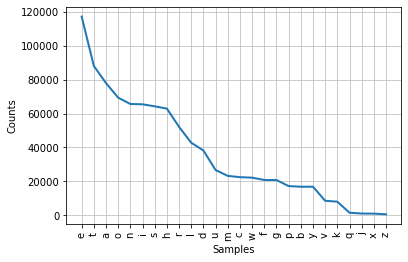

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [43]:
fdist.plot()

## 3-3   Text Processing with Unicode

#### Unicode
supports over a million characters  
Each character is assigned a number, called a code point.  
In Python, code points are written in the form \uXXXX, where XXXX is the number in 4-digit hexadecimal form.

open() function can read encoded data into Unicode strings, and write out Unicode strings in encoded form

In [44]:
path = nltk.data.find('c://nltk_data/corpora/unicode_samples/polish-lat2.txt')

In [45]:
f = open(path, encoding = 'latin2')

In [46]:
for line in f:
    line = line.strip()
    print(line)

Pruska Biblioteka Państwowa. Jej dawne zbiory znane pod nazwą
"Berlinka" to skarb kultury i sztuki niemieckiej. Przewiezione przez
Niemców pod koniec II wojny światowej na Dolny Śląsk, zostały
odnalezione po 1945 r. na terytorium Polski. Trafiły do Biblioteki
Jagiellońskiej w Krakowie, obejmują ponad 500 tys. zabytkowych
archiwaliów, m.in. manuskrypty Goethego, Mozarta, Beethovena, Bacha.


In [47]:
f = open(path, encoding = 'latin2')

In [48]:
for line in f:
    line = line.strip()
    print(line.encode('unicode_escape'))

b'Pruska Biblioteka Pa\\u0144stwowa. Jej dawne zbiory znane pod nazw\\u0105'
b'"Berlinka" to skarb kultury i sztuki niemieckiej. Przewiezione przez'
b'Niemc\\xf3w pod koniec II wojny \\u015bwiatowej na Dolny \\u015al\\u0105sk, zosta\\u0142y'
b'odnalezione po 1945 r. na terytorium Polski. Trafi\\u0142y do Biblioteki'
b'Jagiello\\u0144skiej w Krakowie, obejmuj\\u0105 ponad 500 tys. zabytkowych'
b'archiwali\\xf3w, m.in. manuskrypty Goethego, Mozarta, Beethovena, Bacha.'


In [49]:
ord('ń')

324

In [50]:
nacute = '\u0144'

In [51]:
nacute

'ń'

In [52]:
nacute.encode('utf8')

b'\xc5\x84'

In [53]:
import unicodedata

In [54]:
lines = open(path, encoding='latin2').readlines()

In [55]:
line=lines[2]

In [56]:
print(line.encode('unicode_escape'))

b'Niemc\\xf3w pod koniec II wojny \\u015bwiatowej na Dolny \\u015al\\u0105sk, zosta\\u0142y\\n'


In [57]:
for c in line:
    if ord(c) > 127:
        print('{} U+{:04x}{}'.format(c.encode('utf8'), ord(c), unicodedata.name(c)))

b'\xc3\xb3' U+00f3LATIN SMALL LETTER O WITH ACUTE
b'\xc5\x9b' U+015bLATIN SMALL LETTER S WITH ACUTE
b'\xc5\x9a' U+015aLATIN CAPITAL LETTER S WITH ACUTE
b'\xc4\x85' U+0105LATIN SMALL LETTER A WITH OGONEK
b'\xc5\x82' U+0142LATIN SMALL LETTER L WITH STROKE


## Regular Expressions for Detecting Word Patterns

In [58]:
import re

In [59]:
wordlist = [w for w in nltk.corpus.words.words('en') if w.islower()]

In [60]:
[w for w in wordlist if re.search('ed$',w)]

['abaissed',
 'abandoned',
 'abased',
 'abashed',
 'abatised',
 'abed',
 'aborted',
 'abridged',
 'abscessed',
 'absconded',
 'absorbed',
 'abstracted',
 'abstricted',
 'accelerated',
 'accepted',
 'accidented',
 'accoladed',
 'accolated',
 'accomplished',
 'accosted',
 'accredited',
 'accursed',
 'accused',
 'accustomed',
 'acetated',
 'acheweed',
 'aciculated',
 'aciliated',
 'acknowledged',
 'acorned',
 'acquainted',
 'acquired',
 'acquisited',
 'acred',
 'aculeated',
 'addebted',
 'added',
 'addicted',
 'addlebrained',
 'addleheaded',
 'addlepated',
 'addorsed',
 'adempted',
 'adfected',
 'adjoined',
 'admired',
 'admitted',
 'adnexed',
 'adopted',
 'adossed',
 'adreamed',
 'adscripted',
 'aduncated',
 'advanced',
 'advised',
 'aeried',
 'aethered',
 'afeared',
 'affected',
 'affectioned',
 'affined',
 'afflicted',
 'affricated',
 'affrighted',
 'affronted',
 'aforenamed',
 'afterfeed',
 'aftershafted',
 'afterthoughted',
 'afterwitted',
 'agazed',
 'aged',
 'agglomerated',
 'aggri

In [61]:
[w for w in wordlist if re.search('^..j..t..$',w)]

['abjectly',
 'adjuster',
 'dejected',
 'dejectly',
 'injector',
 'majestic',
 'objectee',
 'objector',
 'rejecter',
 'rejector',
 'unjilted',
 'unjolted',
 'unjustly']